<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Diagnóstico de Modelos

## Hands On - Métricas - Detecção de Diabetes
Fonte: https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1

#### Dicionário de dados

| Variável | Descrição |
| ------ | ------ |
| Pregnancies | Qte de filhos |
| Glucose | Glicose após teste de duas horas |
| BloodPressure | Pressão arterial |
| SkinThickness | Espessura da dobra cutânea do tríceps |
| Insulin | Insulina após teste de duas horas |
| BMI | IMC |
| DiabetesPedigreeFunction | Score de hereditariedade para Diabetes |
| Age | Idade |
| Outcome | 1 se tem diabetes e 0 caso contrário |

### 1) Importação dos dados e checagens iniciais (qte de linhas e colunas, qte de missings, proporção do target, medidas resumo etc)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modelagem
from sklearn.linear_model import LogisticRegression

#métricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats

In [55]:
df = pd.read_csv('diabetes.csv',sep=',')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [56]:
df.Outcome.mean()

0.3489583333333333

**34% de diabéticos na base**

In [57]:
df.shape

(768, 9)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Aparentemente, nenhum valor missing na base.**

In [59]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

**Veja que é estranho termos valores zerados para variáveis como Glicose, Pressão Arterial e etc. É provável que tenham imputado o valor 0 (zero) para valores missing.**

In [60]:
for col in df.columns:
    print(col+": \t",(df[col] == 0).sum(),"missings")

Pregnancies: 	 111 missings
Glucose: 	 5 missings
BloodPressure: 	 35 missings
SkinThickness: 	 227 missings
Insulin: 	 374 missings
BMI: 	 11 missings
DiabetesPedigreeFunction: 	 0 missings
Age: 	 0 missings
Outcome: 	 500 missings


**Como neste hands on não queremos desenvolver o melhor modelo, vamos deixar o tratamento de missings para uma próxima oportunidade.**

In [61]:
import seaborn as sns

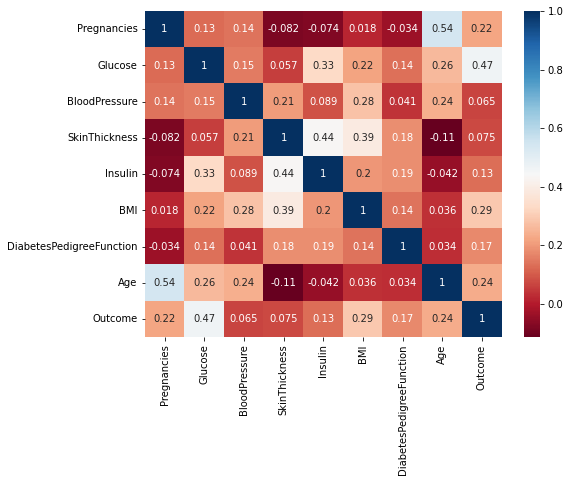

In [62]:
plt.figure(figsize=(8,6)) #ajusta o tamanho da figura
sns.heatmap(df.corr(), cmap='RdBu', annot=True); #troca a cor e coloca o valor da correlação dentro da matriz

**Pouca correlação entre as variáveis**. É provável que o modelo não sofra com problemas de multicolinearidade.

### 2) Ajuste um modelo de Regressão Logística

In [63]:
x = df.drop(['Outcome'],axis = 1)
y = df['Outcome']

In [64]:
modelo = LogisticRegression(fit_intercept=True,random_state=42,max_iter=500)
modelo.fit(x,y)

LogisticRegression(max_iter=500, random_state=42)

In [65]:
df_2 = df.copy()
df_2['Prob'] = modelo.predict_proba(x)[:,1]
df_2['Diabete_Predito'] = modelo.predict(x)

In [66]:
df_2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome      Prob  Diabete_Predito  
0                     0.627   50        1  0.719422                1  
1                     0.351   31        0  0.049286                0  
2                     0.672   32        1  0.792555                1  
3                     0.167   21        0  0.042729                0  
4                     2.288   33        1  0.889689                1

### 3) Calcule as métricas de performance conforme a seguir:

#### 3.1) Matriz de Confusão

In [67]:
# Pacote que cria a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [68]:
cm = confusion_matrix(df_2['Outcome'], df_2['Diabete_Predito'])

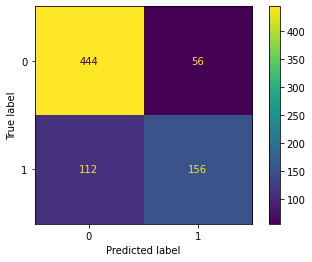

In [69]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

#### 3.2) Plote a Curva ROC do modelo

In [70]:
fpr, tpr, thresholds = roc_curve(df_2['Outcome'], df_2['Prob'])

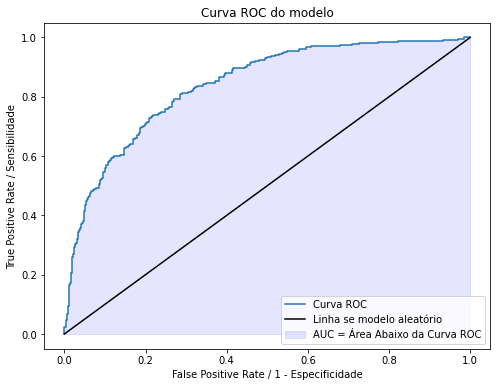

In [71]:
plt.figure(figsize=(8,6))

plt.plot(fpr,tpr, label='Curva ROC')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Linha se modelo aleatório')

plt.title("Curva ROC do modelo")
plt.ylabel('True Positive Rate / Sensibilidade')
plt.xlabel('False Positive Rate / 1 - Especificidade')
plt.legend();

#### 3.3) Calcule o AUC e o KS do modelo

In [72]:
# Calcula a área abaixo da curva ROC
print("O AUC é: ",roc_auc_score(df_2['Outcome'], df_2['Prob']))

O AUC é:  0.8390671641791044


In [73]:
# Prob (Y = 1) quando o Y Real for igual a 0
prob_y_real_0 = df_2.loc[df_2.Outcome==0,"Prob"]

# Prob (Y = 1) quando o Y Real for igual a 1
prob_y_real_1 = df_2.loc[df_2.Outcome==1,"Prob"]

In [74]:
print("O KS é: ",stats.ks_2samp(prob_y_real_0, prob_y_real_1).statistic)

O KS é:  0.5237014925373135


#### 3.4) Precision, Sensibilidade/Recall, Especificidade e F1 Score: Interprete os Resultados!

In [75]:
print(classification_report(df_2['Outcome'], df_2['Diabete_Predito']))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768



In [76]:
especificidade = cm[0,0]/(cm[0,0]+cm[0,1])
print('A especificidade é: ',especificidade)

A especificidade é:  0.888


**DICA**: Em um problema de classificação binária como este, a especificidade também aparece no Classification Report para Recall = 0. No caso, a especificidade é 0,888 ~ 0,89.

Para o corte padrão de probabilidade 0,5, interpretamos:

- **Precision:** 0,74 >> De todos os pacientes que o modelo classificou como diabéticos, 74% realmente estavam diabéticos.<br>
- **Sensibilidade/Recall:** 0,58 >> De todos os pacientes realmente estavam diabéticos, o modelo classificou como diabéticos apenas 58%.<br>
- **Especificidade:** 0.89 >> De todos os pacientes que **não** estavam diabéticos, o modelo classificou como não diabéticos 89%.<br>

#### Qual a métrica prioritária para o problema ? Ou seja, queremos diminuir falsos positivos ou falsos negativos? Além disso, qual o corte de probabilidade que minimiza esse erro?

Ao usar esse modelo para definir se um paciente tem diabete, precisamos diminuir a quantidade de falsos negativos com maior prioridade, pois é mais perigoso não diagnosticar um paciente que realmente tem diabetes do que dizer que alguém que não tenha diabetes deva fazer um tratamento de diminuição de açúcar ou melhora da capacidade física.

Portanto, para diminuir os falsos negativos, **precisamos de modelos com melhores sensibilidades (recall)**.

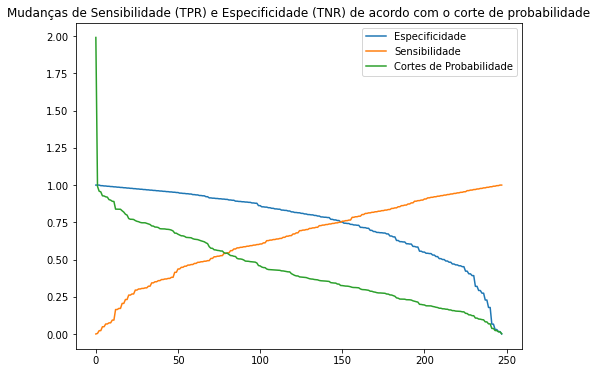

In [77]:
plt.figure(figsize=(8,6))

plt.plot(1-fpr,label='Especificidade')
plt.plot(tpr,label='Sensibilidade')
plt.plot(thresholds,label='Cortes de Probabilidade')
         
plt.legend()
plt.title("Mudanças de Sensibilidade (TPR) e Especificidade (TNR) de acordo com o corte de probabilidade");

In [78]:
# Pelo gráfico acima, talvez um valor de corte superior a 0.25 pode aumentar a Sensibilidade sem perder tanta Especificidade.
df_2['Diabete_Predito'] = np.where(df_2['Prob']>0.25,1,0)

In [79]:
cm2 = confusion_matrix(df_2['Outcome'], df_2['Diabete_Predito'])

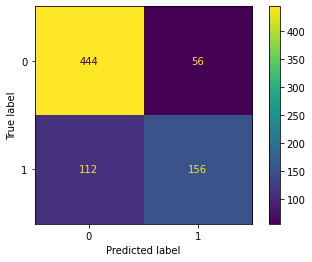

In [80]:
# Matriz Com Corte > 0.5 (Padrão)
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

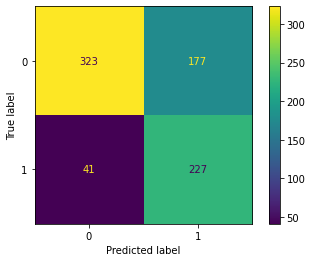

In [81]:
# Matriz Com Corte > 0.25 (Após a mudança para melhorar a sensibilidade)
ConfusionMatrixDisplay(confusion_matrix=cm2,).plot();

Perceba como a **quantidade de falsos negativos diminuiu**.

In [98]:
print(classification_report(df_2['Outcome'], df_2['Diabete_Predito']))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       500
           1       0.56      0.85      0.68       268

    accuracy                           0.72       768
   macro avg       0.72      0.75      0.71       768
weighted avg       0.77      0.72      0.72       768



Perceba também como a **sensibilidade (recall) também aumentou de 58% para 85%**.

#### 3.5) Ajuste 4 modelos diferentes e plot as curvas ROC dos 4 modelos no mesmo gráfico. 

**Qual o melhor modelo analisando graficamente as curvas?**

*Dica*: Ajuste modelos com a combinação das variáveis da base. Ex: Modelo 1 ( Glucose e BloodPressure ), Modelo 2 (Pregnancies e Insulin) etc.

In [82]:
variaveis = [ ['Glucose','BloodPressure'],['Pregnancies','Insulin'],['BMI','SkinThickness'],['DiabetesPedigreeFunction','Age'] ]

In [83]:
lista_de_modelos = []

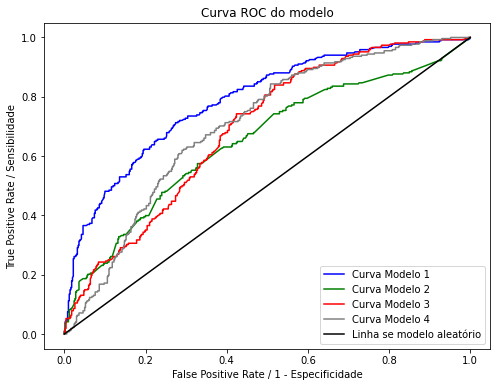

In [84]:
plt.figure(figsize=(8,6))

for i in range(4):
    x_aux = df[variaveis[i]]
    
    # ajusta um novo modelo e inclui na lista de modelos
    lista_de_modelos.append(LogisticRegression(fit_intercept=True,random_state=42,max_iter=500))
    lista_de_modelos[i].fit(x_aux,y)
    prob = lista_de_modelos[i].predict_proba(x_aux)[:,1]
    
    fpr, tpr, thresholds = roc_curve(df_2['Outcome'], prob)
    
    nome_modelo = str('Curva Modelo ' + str(i+1))
    cores = ['blue','green','red','gray']
    plt.plot(fpr,tpr, label=nome_modelo,color=cores[i])

    plt.title("Curva ROC do modelo")
    plt.ylabel('True Positive Rate / Sensibilidade')
    plt.xlabel('False Positive Rate / 1 - Especificidade')
    
    
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Linha se modelo aleatório')
plt.legend();

**O modelo 1 com variáveis ['Glucose', 'BloodPressure'] parece ser o melhor modelo**, pois é o que mais se aproxima do canto esquerdo superior do gráfico (ou seja, quando AUC é 100%).

#### 3.6) Utilize esses mesmos 4 modelos e calcule seus respectivos AUC's e KS's. Responda as perguntas abaixo:

In [85]:
variaveis = [ ['Glucose','BloodPressure'],['Pregnancies','Insulin'],['BMI','SkinThickness'],['DiabetesPedigreeFunction','Age'] ]

In [86]:
lista_de_modelos = []
lista_de_aucs = []
lista_de_ks = []

In [87]:
for i in range(4):
    x_aux = df[variaveis[i]]
    
    # ajusta um novo modelo e inclui na lista de modelos
    lista_de_modelos.append(LogisticRegression(fit_intercept=True,random_state=42,max_iter=500))
    lista_de_modelos[i].fit(x_aux,y)
    prob = lista_de_modelos[i].predict_proba(x_aux)[:,1]
    
    
    #calcula o AUC e inclui na lista de AUCs
    lista_de_aucs.append(roc_auc_score(y, prob))
    
    
    
    #cria um dataset completo para calculo do KS
    df_aux = x_aux.copy()
    df_aux['Prob'] = prob
    df_aux['Outcome'] = y
    
    prob_y_real_0 = df_aux.loc[df_aux.Outcome==0,"Prob"]
    prob_y_real_1 = df_aux.loc[df_aux.Outcome==1,"Prob"]

    #calcula o KS e inclui na lista de KSs
    lista_de_ks.append(stats.ks_2samp(prob_y_real_0, prob_y_real_1).statistic)


In [88]:
df_medidas = pd.DataFrame({"Variáveis do Modelo:": variaveis, "AUCs":lista_de_aucs,"KSs":lista_de_ks})
df_medidas

Variáveis do Modelo:      AUCs       KSs
0         [Glucose, BloodPressure]  0.787825  0.438687
1           [Pregnancies, Insulin]  0.650235  0.246627
2             [BMI, SkinThickness]  0.690246  0.321552
3  [DiabetesPedigreeFunction, Age]  0.703769  0.335284

##### 3.6.1) Sua decisão de modelo vencedor estava correta quando comparado com o AUC ?



Sim, pois o AUC ficou em 0,78, o maior AUC entre os modelos ajustados.

##### 3.6.2) Plote as medidas em um gráfico de dispersão (AUC x KS). O que é possível dizer da relação entre AUC e KS ?

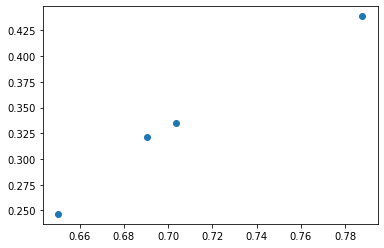

In [89]:
plt.scatter(df_medidas['AUCs'],df_medidas['KSs'])

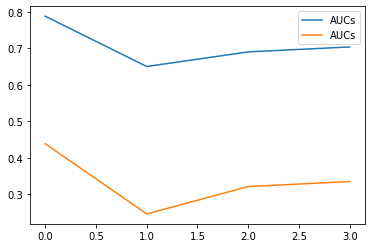

In [90]:
plt.plot(df_medidas['AUCs'],label="AUCs")
plt.plot(df_medidas['KSs'],label="AUCs")
plt.legend()

In [91]:
df_medidas.corr()

AUCs       KSs
AUCs  1.000000  0.992777
KSs   0.992777  1.000000

O que podemos perceber é que as medidas AUC e KS, embora tenham escalas diferentes, são correlacionadas positivamente. O que era esperado, pois em ambas quanto maior é o valor, melhor é a qualidade do modelo.

#### Bônus: Interprete o modelo

In [92]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [93]:
pd.DataFrame({"Variável": x.columns,"Coeficientes": modelo.coef_.ravel() ,"Odds": np.exp(modelo.coef_).ravel()}).sort_values(by='Odds',ascending=False)

Variável  Coeficientes      Odds
6  DiabetesPedigreeFunction      0.867927  2.381968
0               Pregnancies      0.122496  1.130315
5                       BMI      0.089665  1.093807
1                   Glucose      0.035109  1.035733
7                       Age      0.014989  1.015102
3             SkinThickness      0.000775  1.000776
4                   Insulin     -0.001174  0.998827
2             BloodPressure     -0.013302  0.986786

É preciso ter cuidado com o tipo de interpretação, pois as variáveis estão em escalas diferentes. Não podemos usar os coeficientes para determinar as variáveis "mais importantes para o modelo", pois o aumento de uma unidade de Pregnancies, que aumentaria em 13% a chance de ser diabético, é diferente do aumento de uma unidade de Glucose, por exemplo, que traria apenas 3,5% (odds = 1,035) de aumento na chance de ser diabético, embora nós saibamos que o nível de glicose no sangue é muito mais importante que número de gravidez. Para comparar a importância das variáveis é necessário fazer uma padronização dos valores numéricos usando pacotes como o [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=scaler#sklearn.preprocessing.MinMaxScaler.transform) .

In [94]:
import seaborn as sns

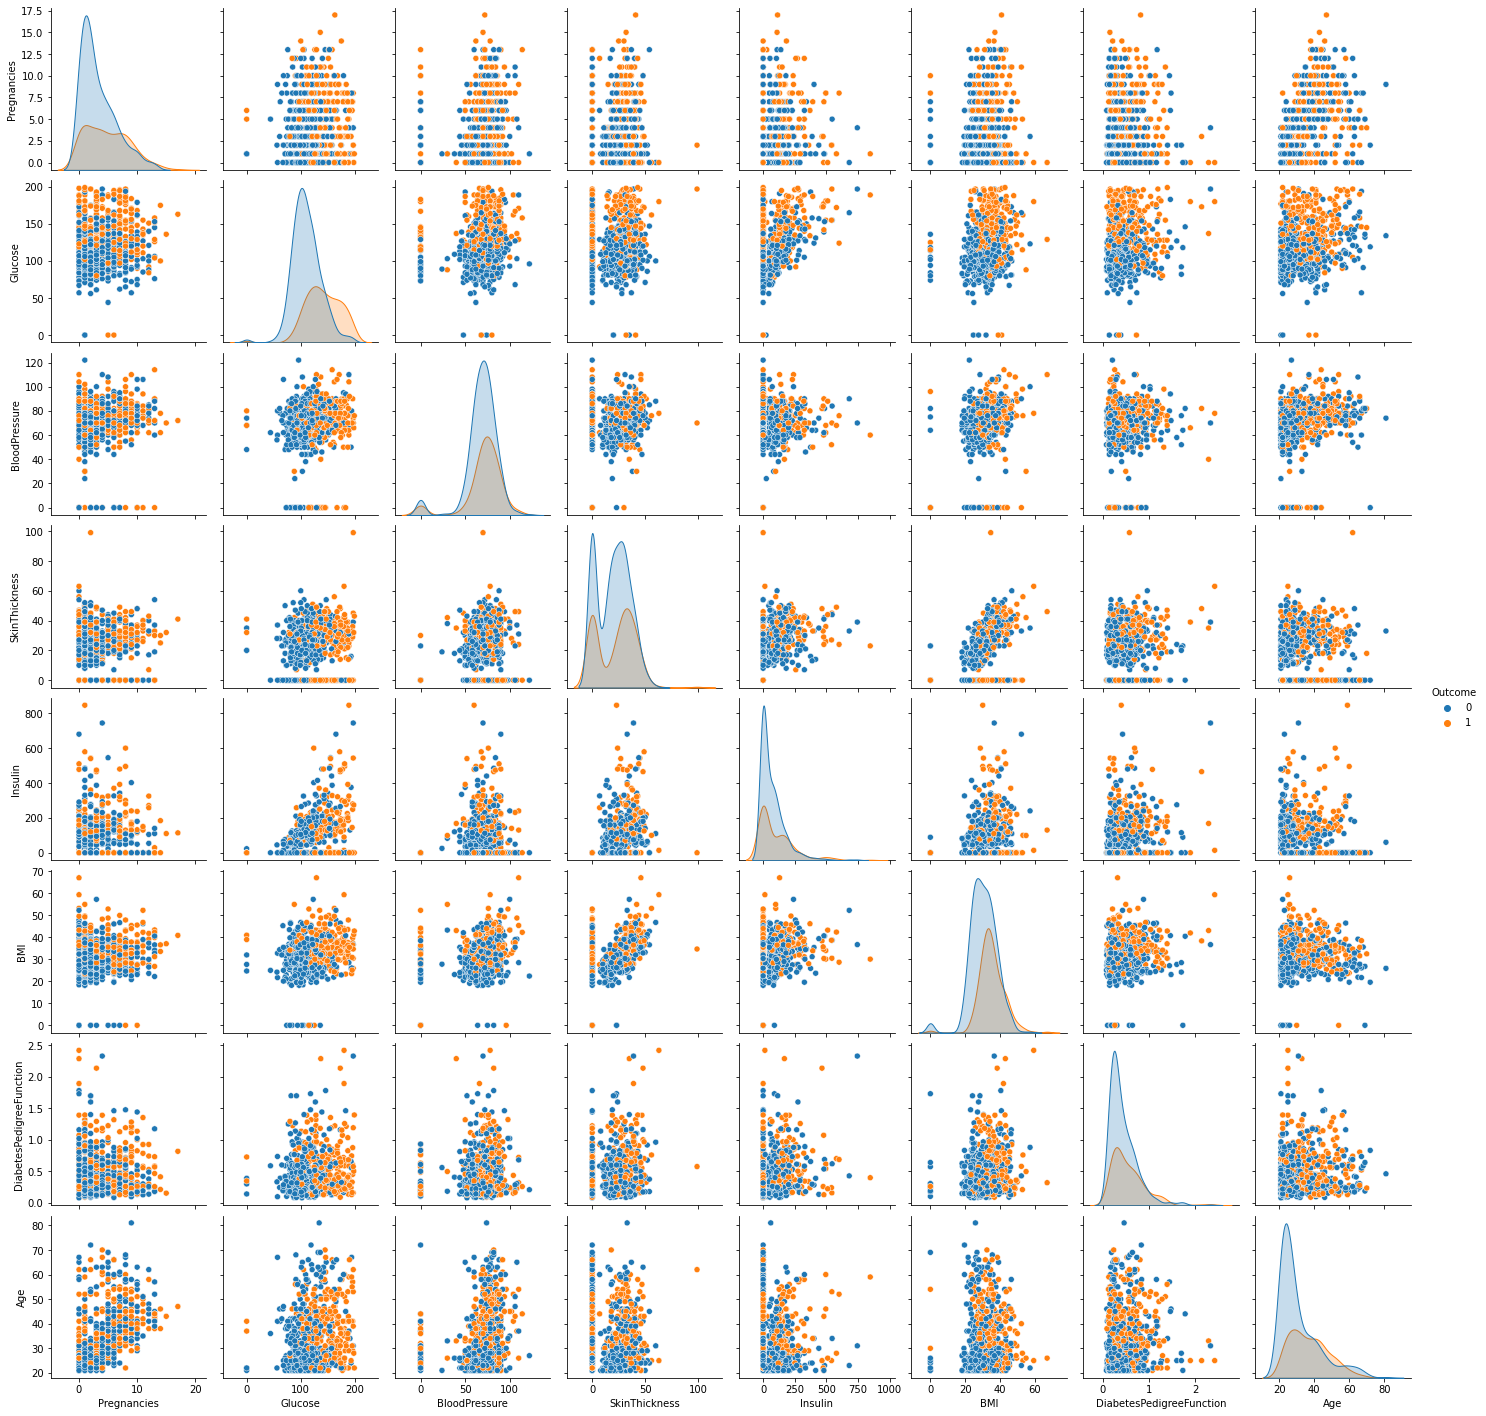

In [95]:
sns.pairplot(df,hue='Outcome')

Perceba que a variável "Glucose" parece ser uma boa separadora das classes 1 e 0. A partir de cerca de 150 temos um grande número de diabéticos. Veja:

In [96]:
print("Proporção de diabéticos da base: ",df.Outcome.mean())

Proporção de diabéticos da base:  0.3489583333333333


In [97]:
print("Proporção de diabéticos quando Glicose for maior que 150: ",df[df.Glucose > 150].Outcome.mean())

Proporção de diabéticos quando Glicose for maior que 150:  0.75
